In [1]:
import yfinance as yf
import os
import pandas as pd

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    btc.to_csv("btc.csv")

In [4]:
btc

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2023-11-21 00:00:00+00:00,37469.160156,37631.140625,35813.812500,35813.812500,25172163756,0.0,0.0
2023-11-22 00:00:00+00:00,35756.554688,37856.980469,35670.972656,37432.339844,24397247860,0.0,0.0
2023-11-23 00:00:00+00:00,37420.433594,37643.917969,36923.863281,37289.621094,14214948217,0.0,0.0


In [15]:
btc.index = btc.index.tz_localize(None)

In [21]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232192,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2023-11-21,37469.160156,37631.140625,35813.812500,35813.812500,25172163756,8.433333,-0.111240,0.270318
2023-11-22,35756.554688,37856.980469,35670.972656,37432.339844,24397247860,11.400000,-0.138429,0.285873
2023-11-23,37420.433594,37643.917969,36923.863281,37289.621094,14214948217,13.366667,-0.122469,0.274944
2023-11-24,37296.316406,38415.339844,37261.605469,37720.281250,22922957823,16.266667,-0.127673,0.276255


In [17]:

btc.columns = [c.lower() for c in btc.columns]

<AxesSubplot:xlabel='Date'>

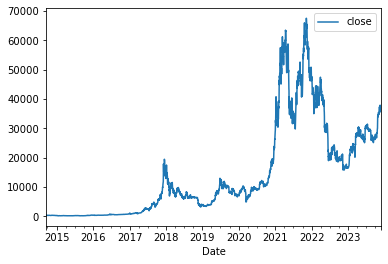

In [8]:
btc.plot.line(y="close", use_index=True)

In [9]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [10]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2023-11-21,8.433333,-0.111240,0.270318
2023-11-22,11.400000,-0.138429,0.285873
2023-11-23,13.366667,-0.122469,0.274944
2023-11-24,16.266667,-0.127673,0.276255


In [19]:
btc = btc.merge(wiki, left_index=True, right_index=True)

In [22]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232192,0.532718
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...
2023-11-21,37469.160156,37631.140625,35813.812500,35813.812500,25172163756,8.433333,-0.111240,0.270318
2023-11-22,35756.554688,37856.980469,35670.972656,37432.339844,24397247860,11.400000,-0.138429,0.285873
2023-11-23,37420.433594,37643.917969,36923.863281,37289.621094,14214948217,13.366667,-0.122469,0.274944
2023-11-24,37296.316406,38415.339844,37261.605469,37720.281250,22922957823,16.266667,-0.127673,0.276255


In [23]:
btc["tommorow"] = btc["close"].shift(-1)

In [24]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tommorow
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232192,0.532718,424.440002
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008
...,...,...,...,...,...,...,...,...,...
2023-11-21,37469.160156,37631.140625,35813.812500,35813.812500,25172163756,8.433333,-0.111240,0.270318,37432.339844
2023-11-22,35756.554688,37856.980469,35670.972656,37432.339844,24397247860,11.400000,-0.138429,0.285873,37289.621094
2023-11-23,37420.433594,37643.917969,36923.863281,37289.621094,14214948217,13.366667,-0.122469,0.274944,37720.281250
2023-11-24,37296.316406,38415.339844,37261.605469,37720.281250,22922957823,16.266667,-0.127673,0.276255,37791.546875


In [26]:
btc["target"] = (btc["tommorow"] > btc["close"]).astype(int)

In [28]:
btc["target"].value_counts()

1    1775
0    1582
Name: target, dtype: int64

In [32]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)

train = btc.iloc[:-200]
test = btc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [33]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.42857142857142855

In [34]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [35]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
        
    return pd.concat(all_predictions)

In [39]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(btc, model, predictors)

In [40]:
precision_score(predictions["target"], predictions["predictions"])

0.5057121096725057

In [42]:
def compute_rolling(btc):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]
    
    for horizon in horizons:
        rolling_averages = btc.rolling(horizon, min_periods=1).mean()
        
        ratio_column = f"close_ration_{horizon}"
        btc[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        btc[edit_column] = rolling_averages["edit_count"]
        
        rolling = btc.rolling(horizon, closed="left", min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        btc[trend_column] = rolling["target"]
        
        new_predictors += [ratio_column, trend_column, edit_column]
        
    return btc, new_predictors

In [43]:
btc, new_predictors = compute_rolling(btc.copy())

In [44]:
btc

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tommorow,target,...,trend_2,close_ration_7,edit_7,trend_7,close_ration_60,edit_60,trend_60,close_ration_365,edit_365,trend_365
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,5.033333,-0.232192,0.532718,424.440002,0,...,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN,1.000000,5.033333,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,5.066667,-0.232760,0.532718,394.795990,0,...,0.0,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000,0.962696,5.050000,0.000000
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,5.200000,-0.235415,0.549385,408.903992,1,...,0.0,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000,0.927789,5.100000,0.000000
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,5.200000,-0.233185,0.549385,398.821014,0,...,0.5,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333,0.970419,5.125000,0.333333
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,5.233333,-0.204017,0.532718,402.152008,1,...,0.5,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000,0.956729,5.146667,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21,37469.160156,37631.140625,35813.812500,35813.812500,25172163756,8.433333,-0.111240,0.270318,37432.339844,1,...,0.5,0.972088,2.423810,0.571429,1.134217,0.952778,0.516667,1.368732,0.606027,0.479452
2023-11-22,35756.554688,37856.980469,35670.972656,37432.339844,24397247860,11.400000,-0.138429,0.285873,37289.621094,0,...,0.5,1.017788,3.985714,0.571429,1.178723,1.130000,0.533333,1.427414,0.634795,0.479452
2023-11-23,37420.433594,37643.917969,36923.863281,37289.621094,14214948217,13.366667,-0.122469,0.274944,37720.281250,1,...,0.5,1.009458,5.828571,0.571429,1.167469,1.340556,0.533333,1.418906,0.669041,0.476712
2023-11-24,37296.316406,38415.339844,37261.605469,37720.281250,22922957823,16.266667,-0.127673,0.276255,37791.546875,1,...,0.5,1.016699,8.071429,0.571429,1.173955,1.599444,0.533333,1.432141,0.711324,0.479452


In [45]:
predictions = backtest(btc, model, new_predictors)

In [46]:
precision_score(predictions["target"], predictions["predictions"])

0.5231607629427792

In [47]:
predictions

,target,predictions
2017-09-16,0,0
2017-09-17,1,1
2017-09-18,0,0
2017-09-19,0,1
2017-09-20,0,1
...,...,...
2023-11-21,1,1
2023-11-22,0,0
2023-11-23,1,0
2023-11-24,1,0
